## CETM46 ASSIGNMENT 2
### TOPIC: VEHICLE INSURANCE FRAUD DETECTION USING MACHINE LEARNING

**NAME:** NKONYE IYI

**STUDENT ID:** 239387778


    

### Dataset ('fraud_oracle.csv')
Available on Kaggle: https://www.kaggle.com/datasets/shivamb/vehicle-claim-fraud-detection

### Dataset Description
The fraud_oracle dataset is related to insurance claims. It contains a total of 15,420 entries and 33 attributes/ columns. This attributes can be grouped into the following:

### Temporal Attributes
These attributes relate to the timing of the insurance claim and accident:
- *Month*: The month in which the accident occurred.
- *WeekOfMonth*: The week of the month in which the accident occurred.
- *DayOfWeek*: The day of the week on which the accident occurred.
- *MonthClaimed*: The month in which the claim was made.
- *WeekOfMonthClaimed*: The week of the month in which the claim was made.
- *DayOfWeekClaimed*: The day of the week on which the claim was made.
- *Year*: The year the insurance policy was issued.

### Demographic Attributes
These attributes relate to the personal information of the claimant:
- *Sex*: The gender of the claimant.
- *MaritalStatus*: The marital status of the claimant.
- *Age*: The age of the claimant.
- *AgeOfPolicyHolder*: Age range category of the policyholder.

### Vehicle and Policy Specific Attributes
These attributes are specific to the vehicle and the insurance policy details:
- *Make*: Brand of the vehicle involved in the accident.
- *VehicleCategory*: The category of the vehicle (e.g., sedan, SUV).
- *VehiclePrice*: Price range category of the vehicle.
- *PolicyType*: Type of insurance policy.
- *BasePolicy*: The base type of the insurance policy.

### Insurance Claim Attributes
Attributes specifically related to the claim and the policy conditions:
- *Fault*: Indicates who was at fault in the accident.
- *Deductible*: The deductible amount in the insurance policy.
- *DriverRating*: Rating of the driver as per the insurance policy.
- *Days_Policy_Accident*: How soon after the policy start the accident occurred.
- *Days_Policy_Claim*: How soon after the policy start the claim was made.
- *PastNumberOfClaims*: Number of past claims made by the policyholder.
- *AgeOfVehicle*: Age range category of the vehicle.
- *PoliceReportFiled*: Indicates whether a police report was filed.
- *WitnessPresent*: Indicates whether a witness was present.
- *AgentType*: Type of agent involved (e.g., External, Internal).

### Additional Information
These attributes provide further contextual information about the claim:
- *AccidentArea*: Indicates whether the accident occurred in an urban or rural area.
- *NumberOfSuppliments*: Number of supplemental claims or additions to the original claim.
- *AddressChange_Claim*: Indicates any address change at the time of the claim.
- *NumberOfCars*: Number of cars insured under the policy.

### Identification Attributes
These are used for record-keeping:
- *PolicyNumber*: Unique identifier for the insurance policy.
- *RepNumber*: Identifier for the representative handling the claim.
- *FraudFound_P*: Indicates whether fraud was found in the claim (likely a binary flag).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import joblib
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer




In [2]:
#Ignore warnings
warnings.filterwarnings('ignore')

#load and read the data set
fraud_data = pd.read_csv("fraud_oracle.csv")



In [3]:
# Displaying the first 5 rows of the dataset, and the shape of the dataset
fraud_data.head()



,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [4]:
# To know  the number of columns and rows in the dataset
fraud_data.shape

(15420, 33)

In [5]:
# Summary statistics of the dataset
fraud_data.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.00,3.0,4.00,5.0
Age,15420.0,39.855707,13.492377,0.0,31.00,38.0,48.00,80.0
FraudFound_P,15420.0,0.059857,0.237230,0.0,0.00,0.0,0.00,1.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,3855.75,7710.5,11565.25,15420.0
RepNumber,15420.0,8.483268,4.599948,1.0,5.00,8.0,12.00,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.0,400.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,2.0,3.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1995.0,1996.00,1996.0


In [6]:
#to check for missing values
fraud_data.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [7]:
# To check for unique values in the dataset
fraud_data.nunique()

Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            8
MonthClaimed               13
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
FraudFound_P                2
PolicyNumber            15420
RepNumber                  16
Deductible                  4
DriverRating                4
Days_Policy_Accident        5
Days_Policy_Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange_Claim         5
NumberOfCars                5
Year                        3
BasePolicy                  3
dtype: int

In [8]:
# To check for the data types of the columns
fraud_data.dtypes

Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
FraudFound_P             int64
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days_Policy_Accident    object
Days_Policy_Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange_Claim     object
NumberOfCars            object
Year                     int64
BasePoli

In [9]:
#Distribution of the target variable
fraud_data['FraudFound_P'].value_counts()

FraudFound_P
0    14497
1      923
Name: count, dtype: int64

## DATA CLEANING AND PREPOCESSING

In [10]:
# To rename the values in the target variable   FraudFound_P
fraud_data['FraudFound_P'] = fraud_data['FraudFound_P'].replace({0: 'No Fraud', 1: 'Fraud'})

print(fraud_data['FraudFound_P'])
fraud_data.head()


0        No Fraud
1        No Fraud
2        No Fraud
3        No Fraud
4        No Fraud
           ...   
15415       Fraud
15416    No Fraud
15417       Fraud
15418    No Fraud
15419       Fraud
Name: FraudFound_P, Length: 15420, dtype: object


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [11]:
# To check for duplicate values
fraud_data.duplicated().sum()

0

In [12]:
# convert the categorical columns to appropriate data types
categorical_columns = ['Month', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'Sex', 
                       'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 
                       'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 
                       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
                         'AddressChange_Claim', 'NumberOfCars', 'BasePolicy']

for col in categorical_columns:
    fraud_data[col] = fraud_data[col].astype('category')

#check the categories in the categorical columns
for col in categorical_columns:
    print(fraud_data[col].value_counts())


Month
Jan    1411
May    1367
Mar    1360
Jun    1321
Oct    1305
Dec    1285
Apr    1280
Feb    1266
Jul    1257
Sep    1240
Nov    1201
Aug    1127
Name: count, dtype: int64
Make
Pontiac      3837
Toyota       3121
Honda        2801
Mazda        2354
Chevrolet    1681
Accura        472
Ford          450
VW            283
Dodge         109
Saab          108
Mercury        83
Saturn         58
Nisson         30
BMW            15
Jaguar          6
Porche          5
Mecedes         4
Ferrari         2
Lexus           1
Name: count, dtype: int64
AccidentArea
Urban    13822
Rural     1598
Name: count, dtype: int64
DayOfWeekClaimed
Monday       3757
Tuesday      3375
Wednesday    2951
Thursday     2660
Friday       2497
Saturday      127
Sunday         52
0               1
Name: count, dtype: int64
MonthClaimed
Jan    1446
May    1411
Mar    1348
Oct    1339
Jun    1293
Feb    1287
Nov    1285
Apr    1271
Sep    1242
Jul    1225
Dec    1146
Aug    1126
0         1
Name: count, dtype: int64


In [13]:
fraud_data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [14]:
fraud_data.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.00,3.0,4.00,5.0
Age,15420.0,39.855707,13.492377,0.0,31.00,38.0,48.00,80.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,3855.75,7710.5,11565.25,15420.0
RepNumber,15420.0,8.483268,4.599948,1.0,5.00,8.0,12.00,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.0,400.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,2.0,3.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1995.0,1996.00,1996.0


## EXPLORATORY DATA ANALYSIS

## Visualizing the distribution of the target variable

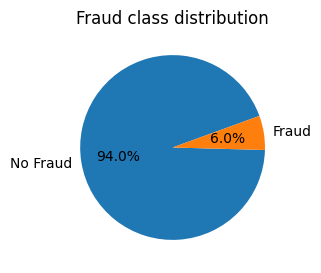

In [15]:

#Visualizing the distribution of the target variable
# Count the occurrences of each class
class_counts = fraud_data['FraudFound_P'].value_counts()

# Plot the class distribution with a pie chart
plt.figure(figsize=(3,3))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=20)
plt.title('Fraud class distribution')
plt.show()


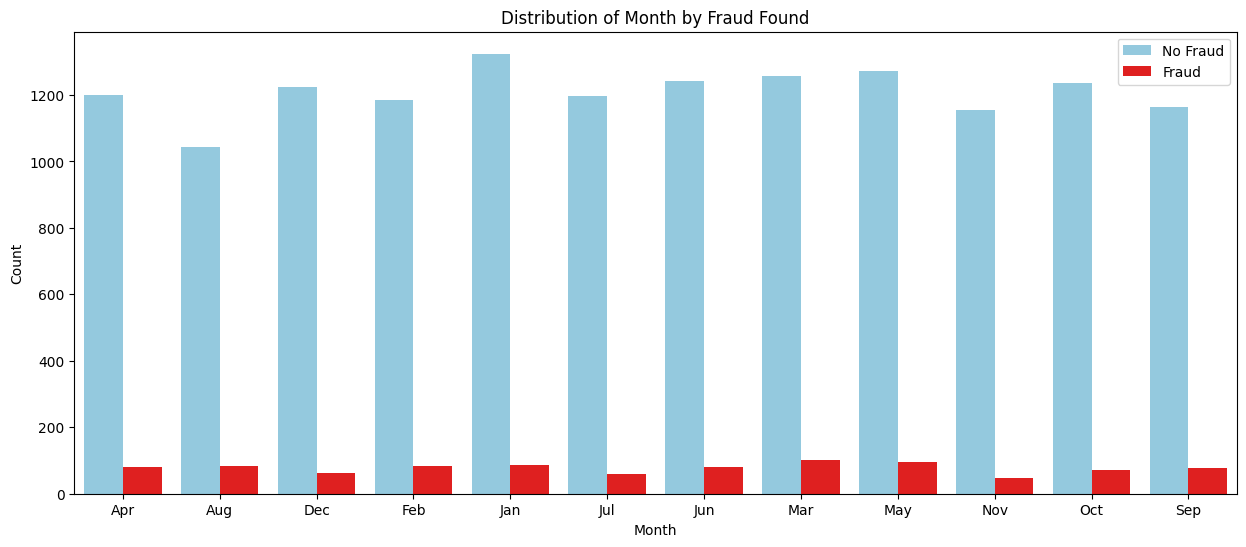

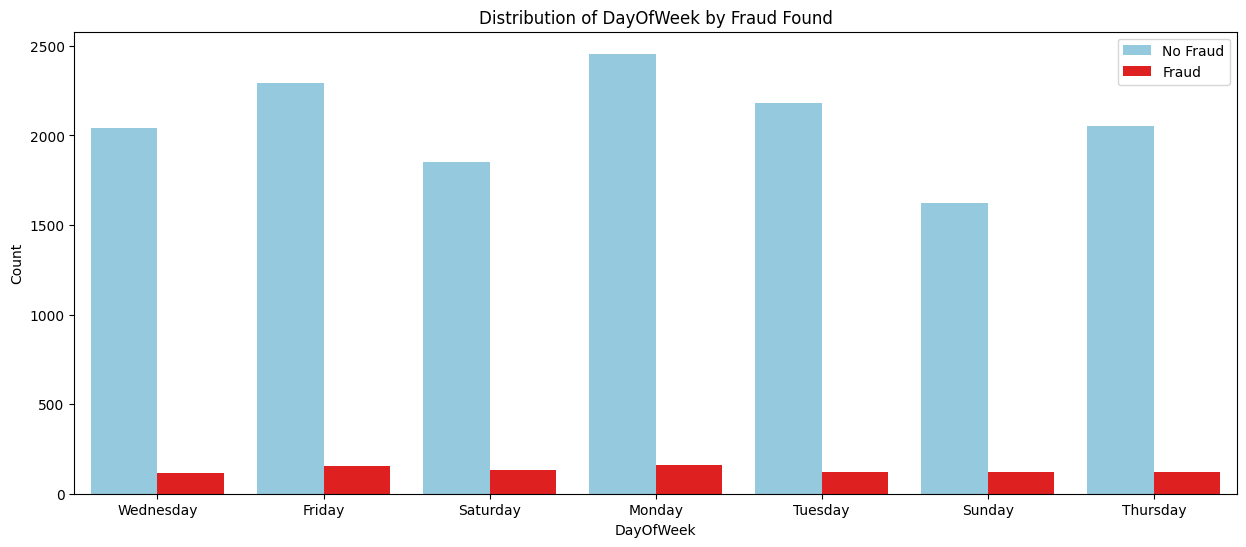

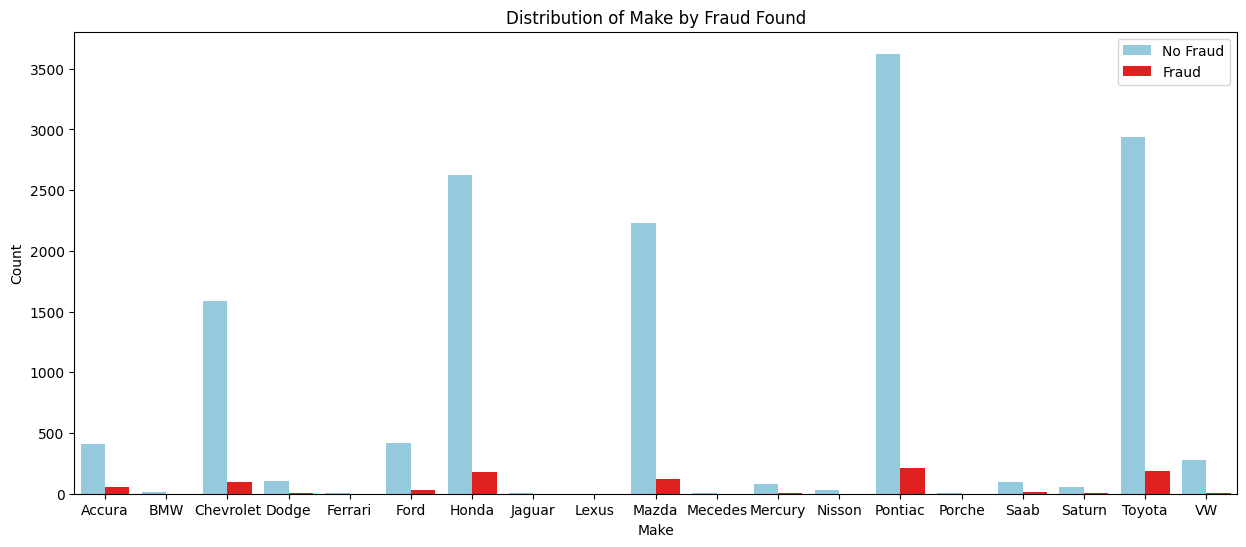

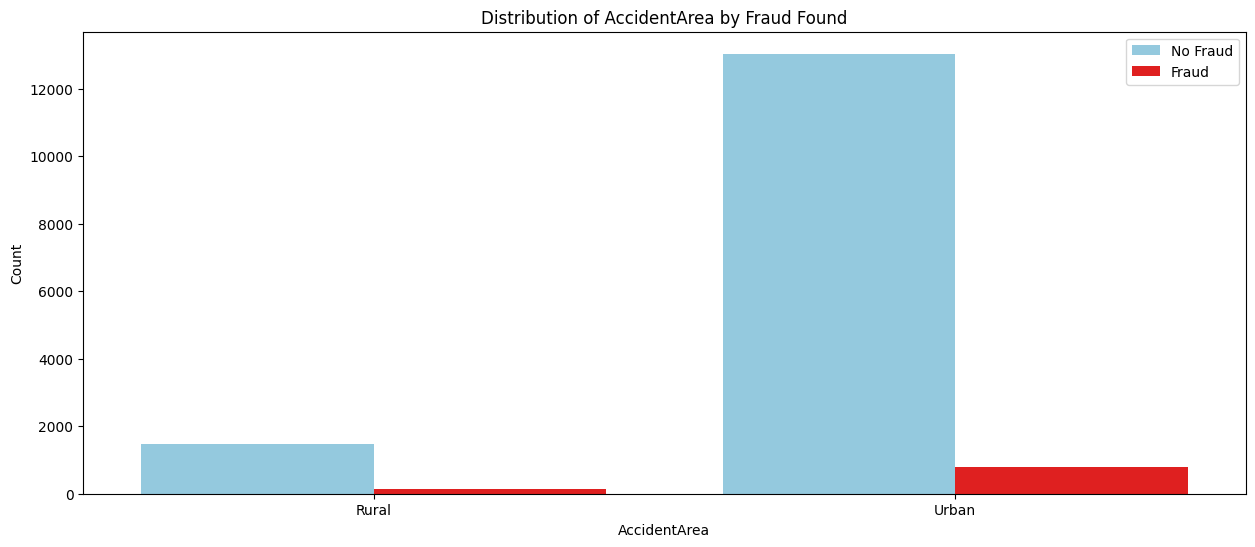

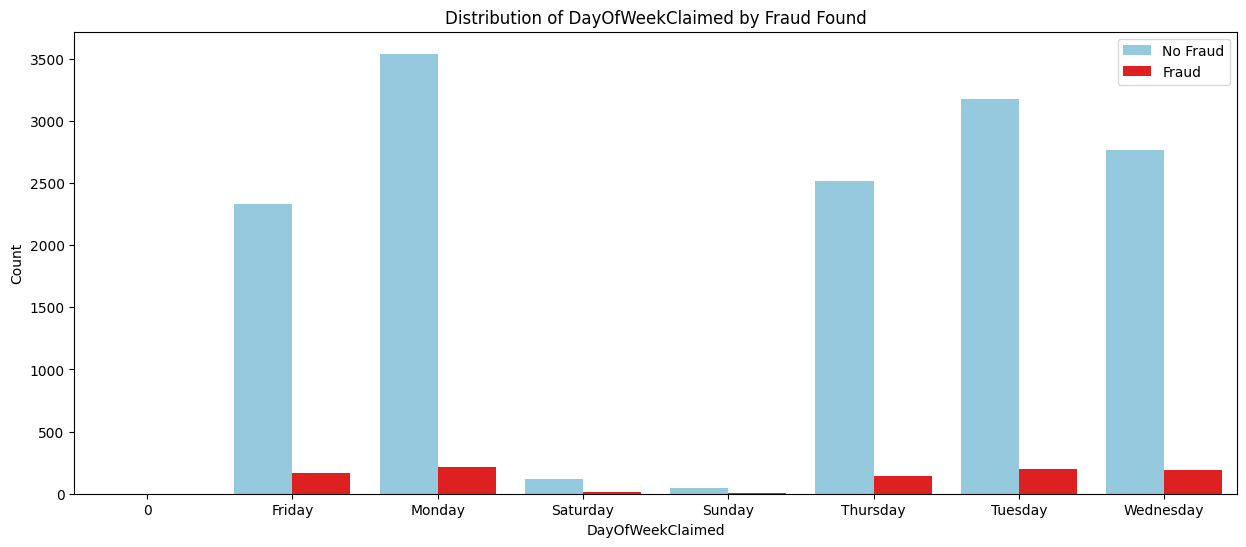

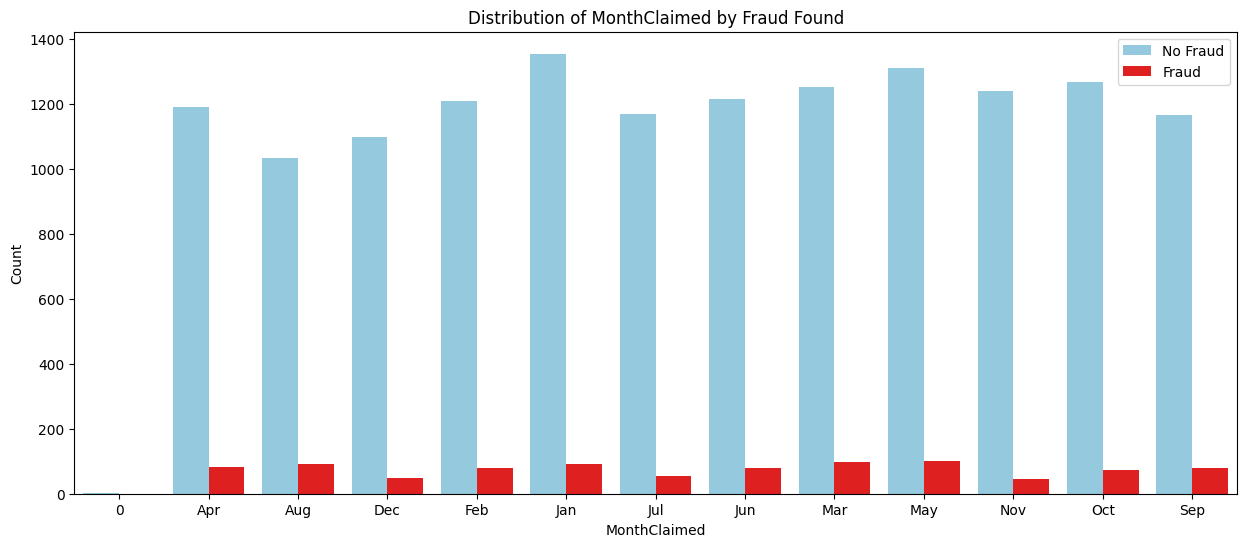

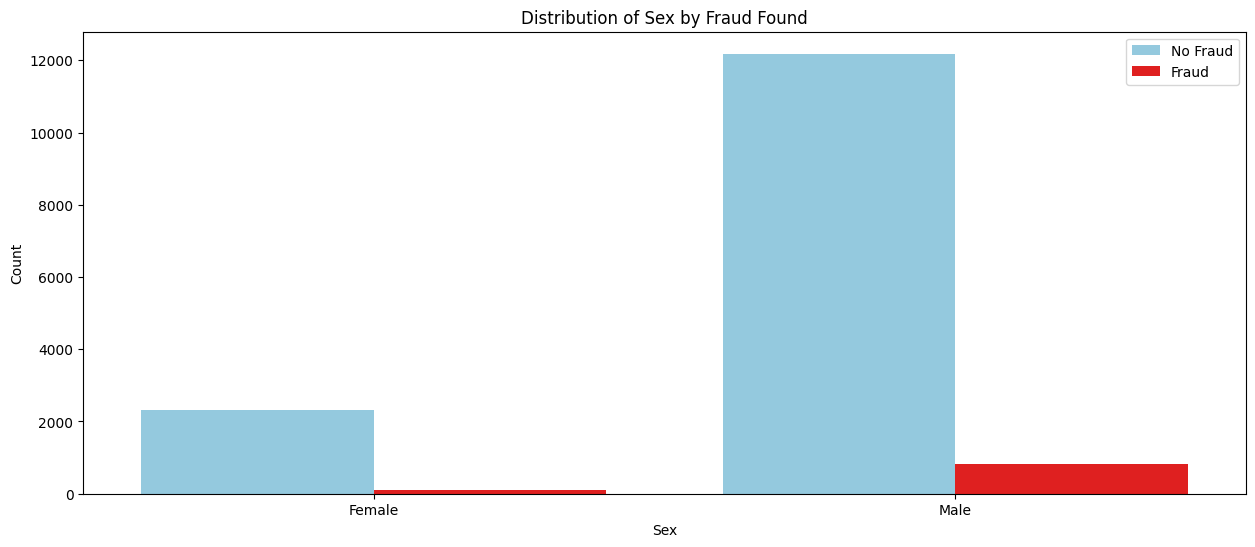

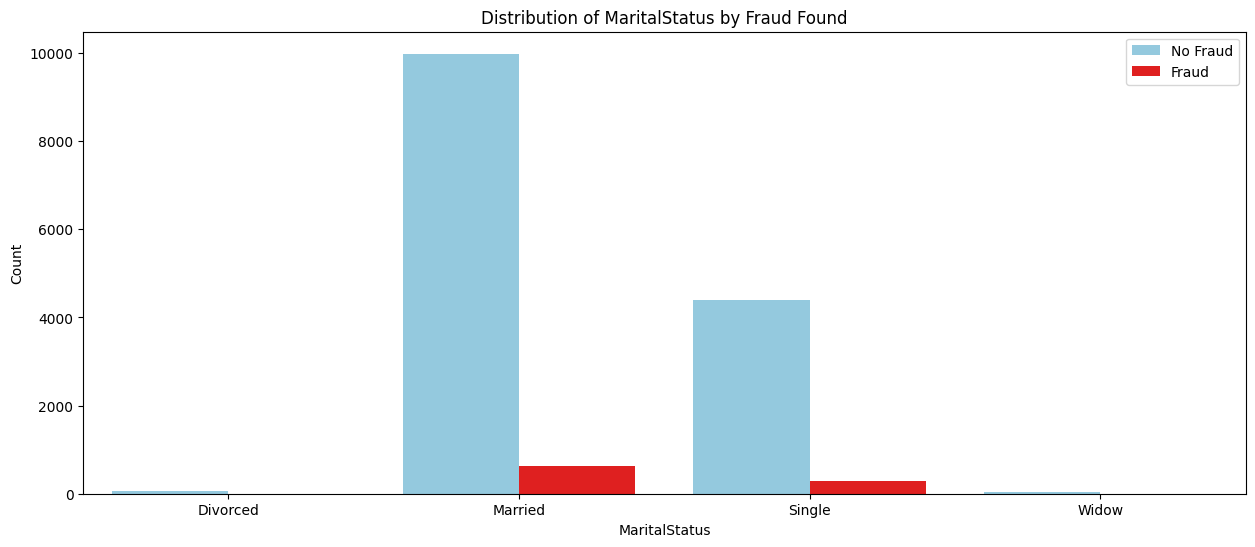

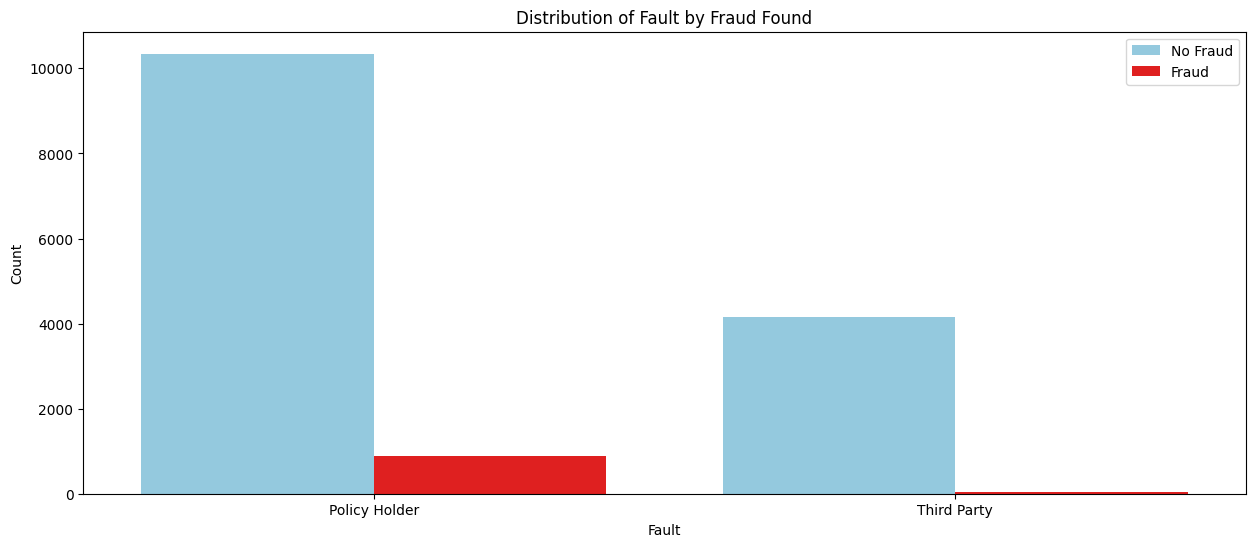

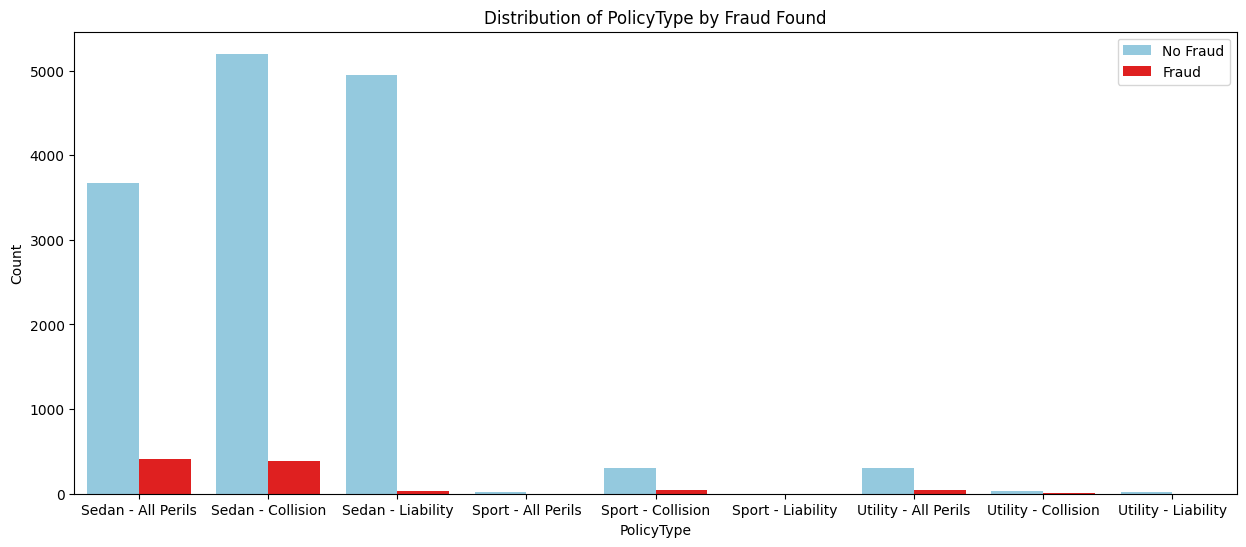

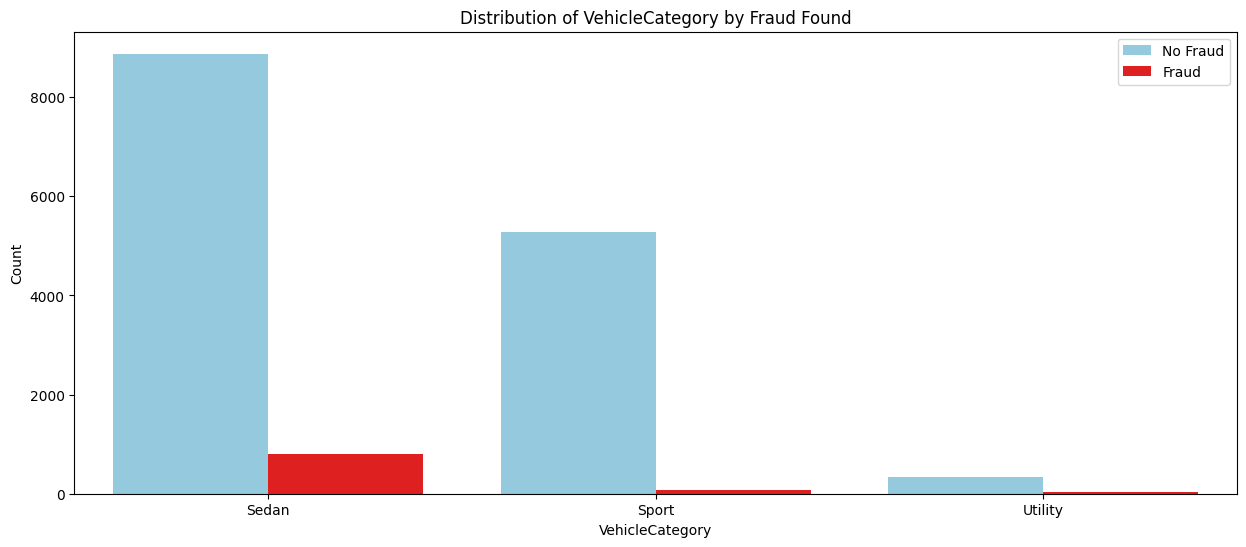

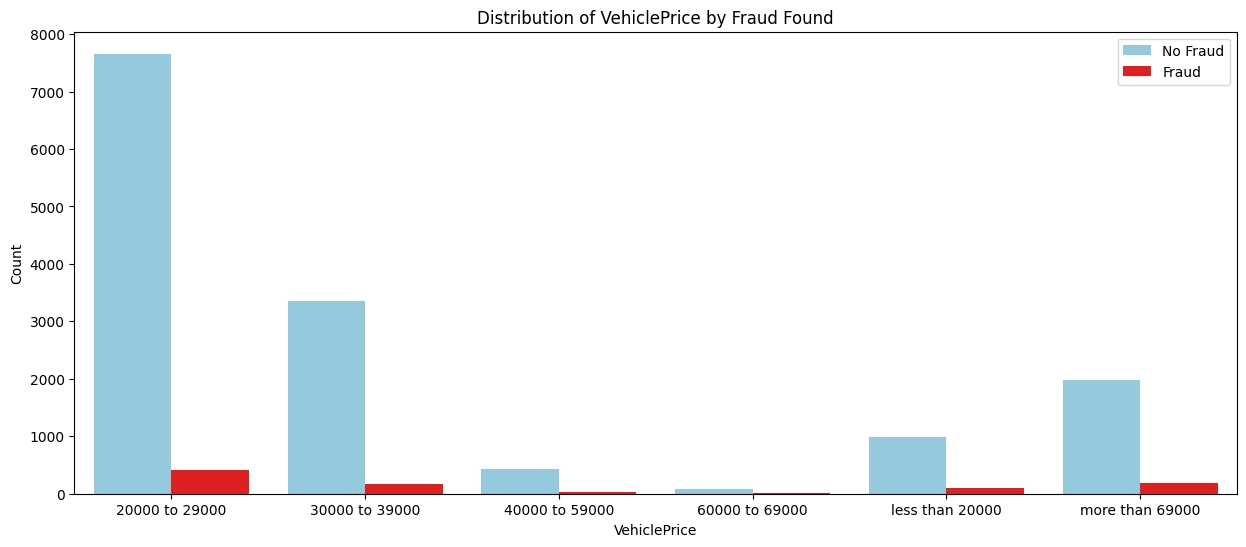

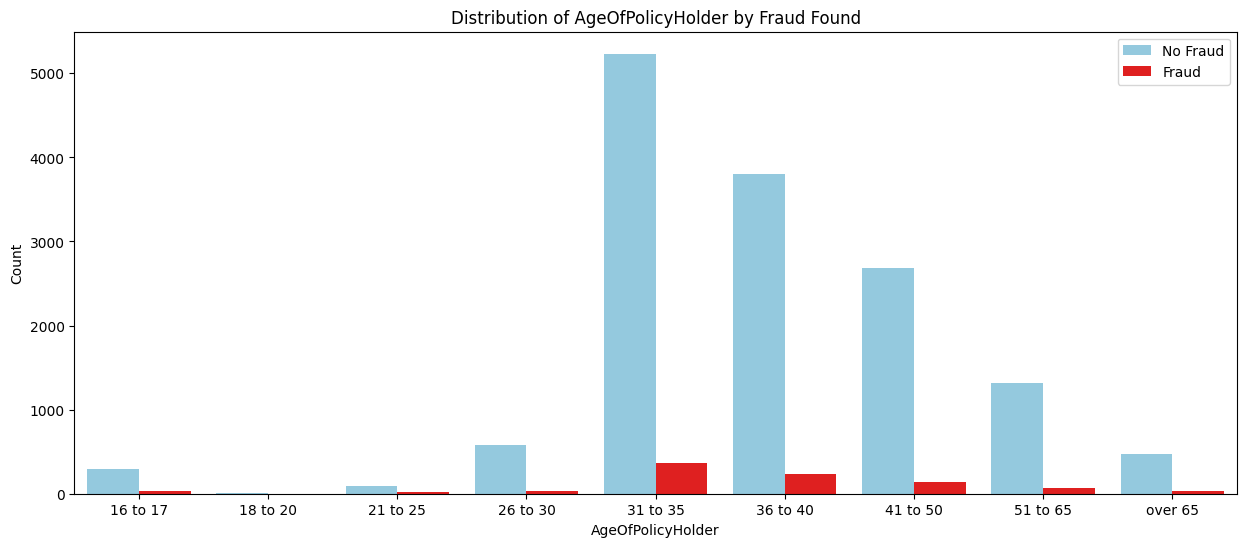

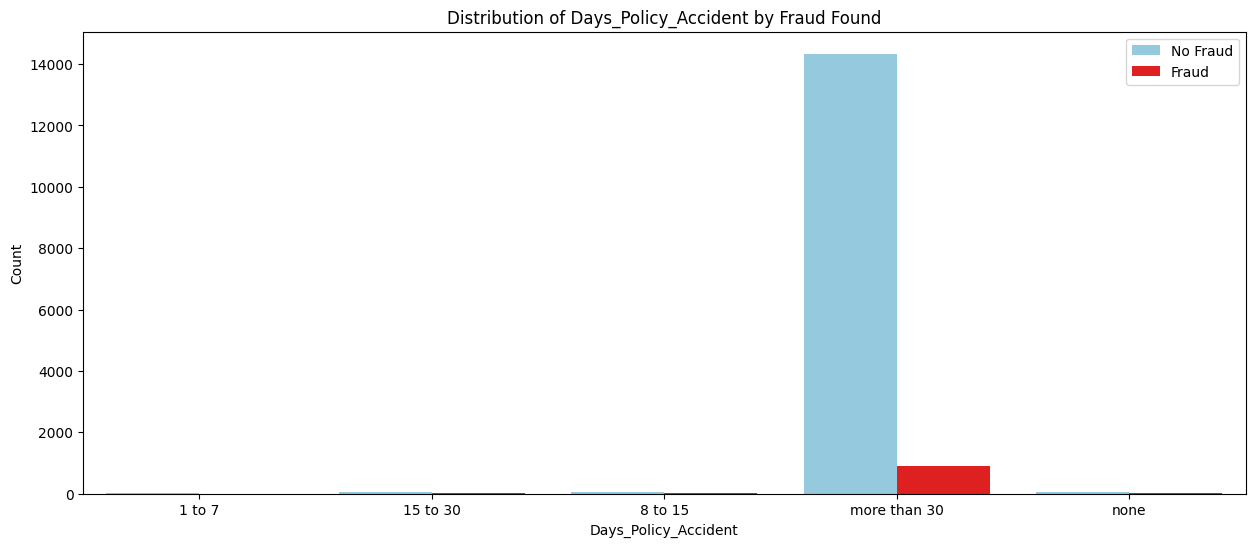

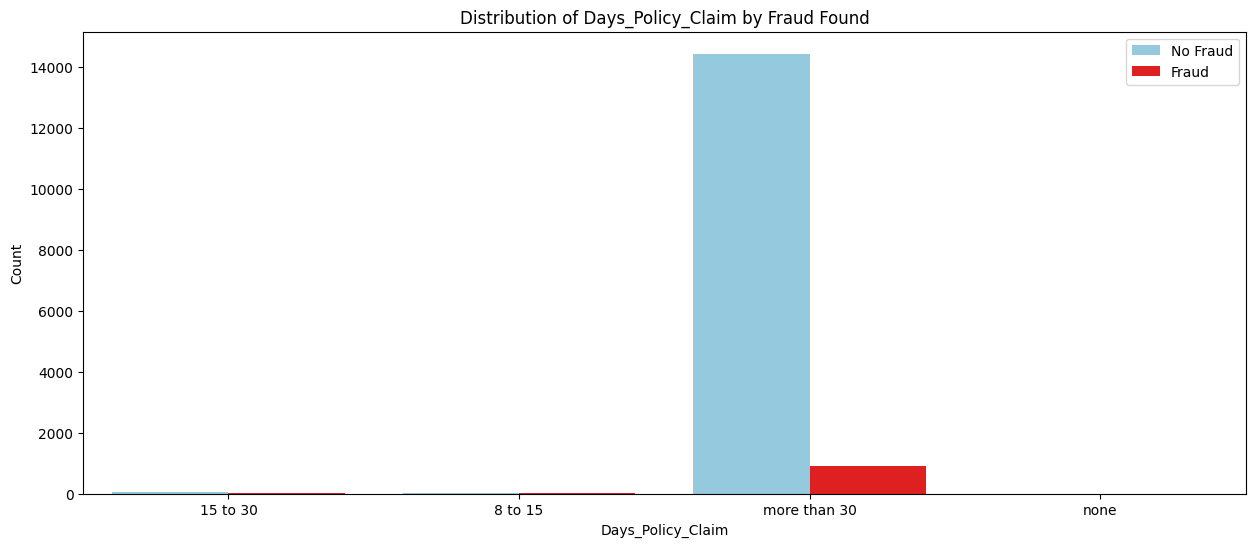

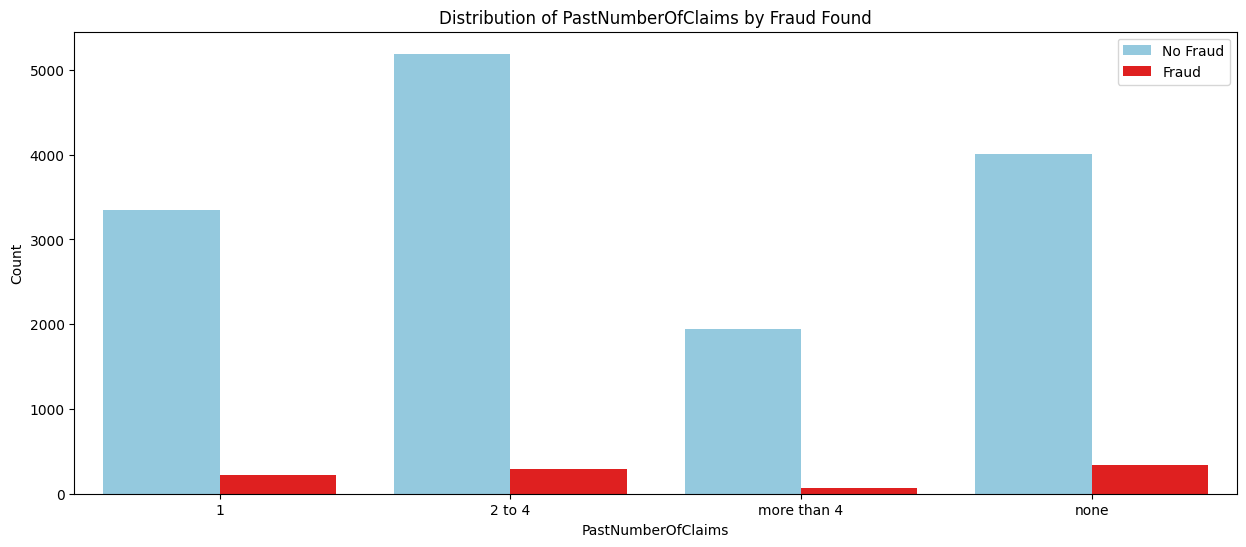

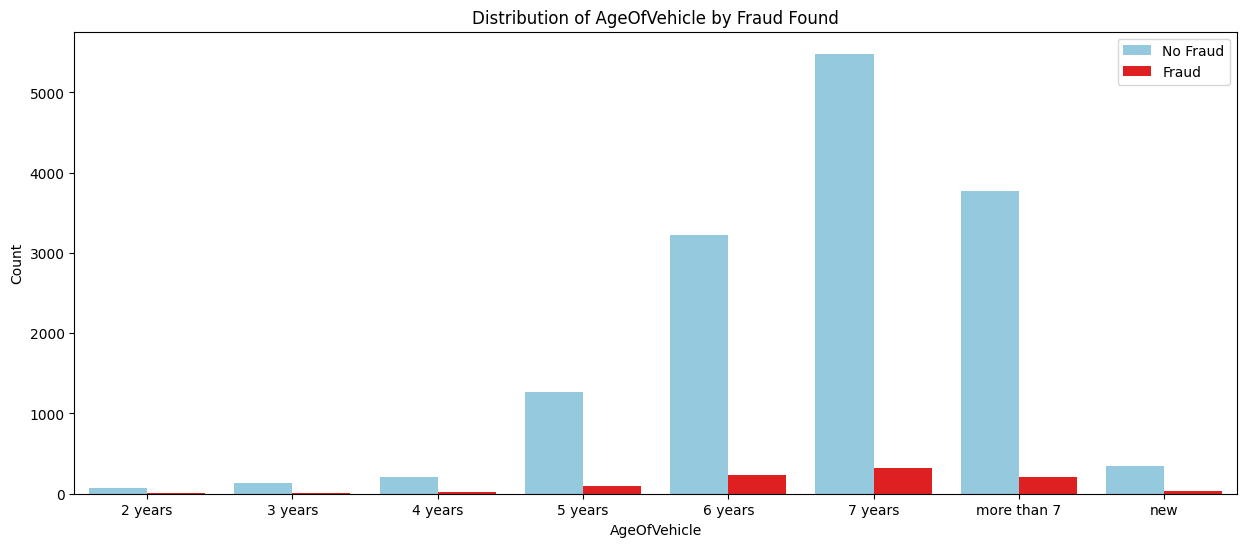

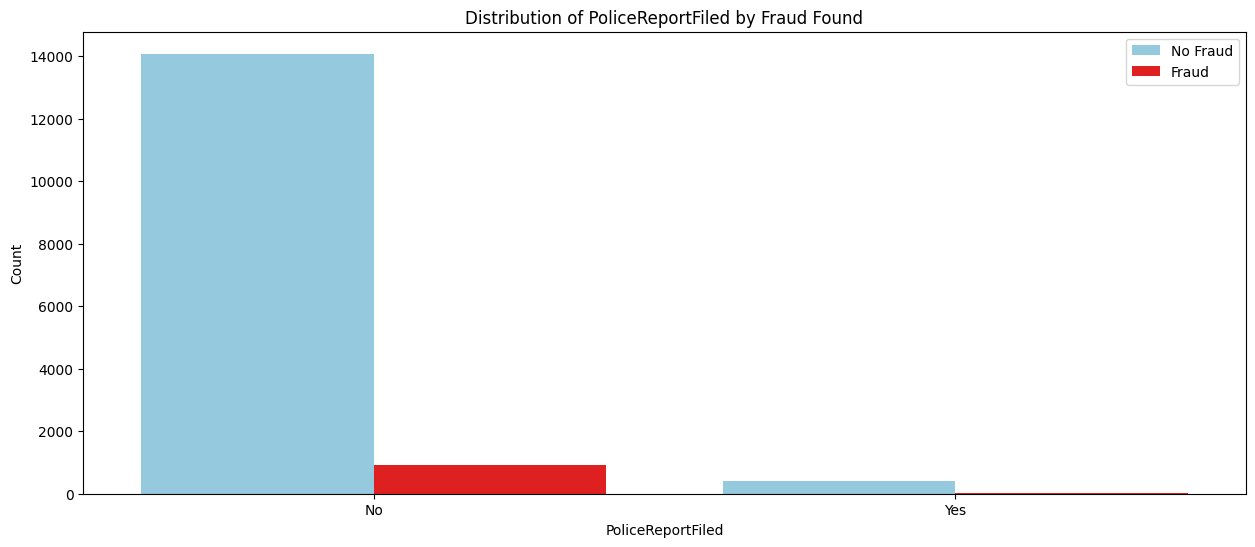

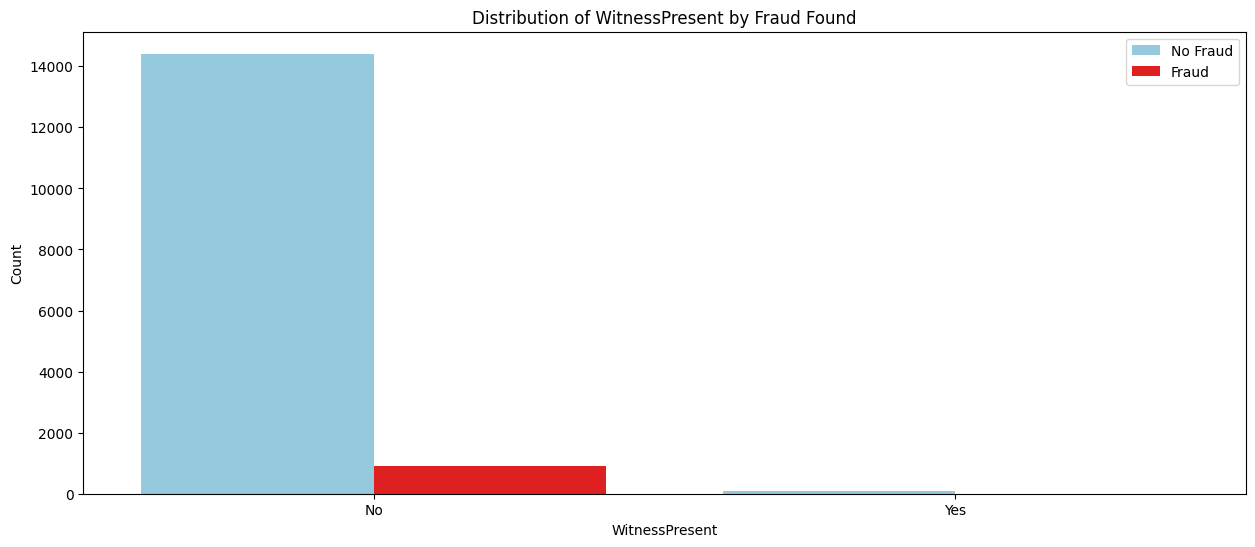

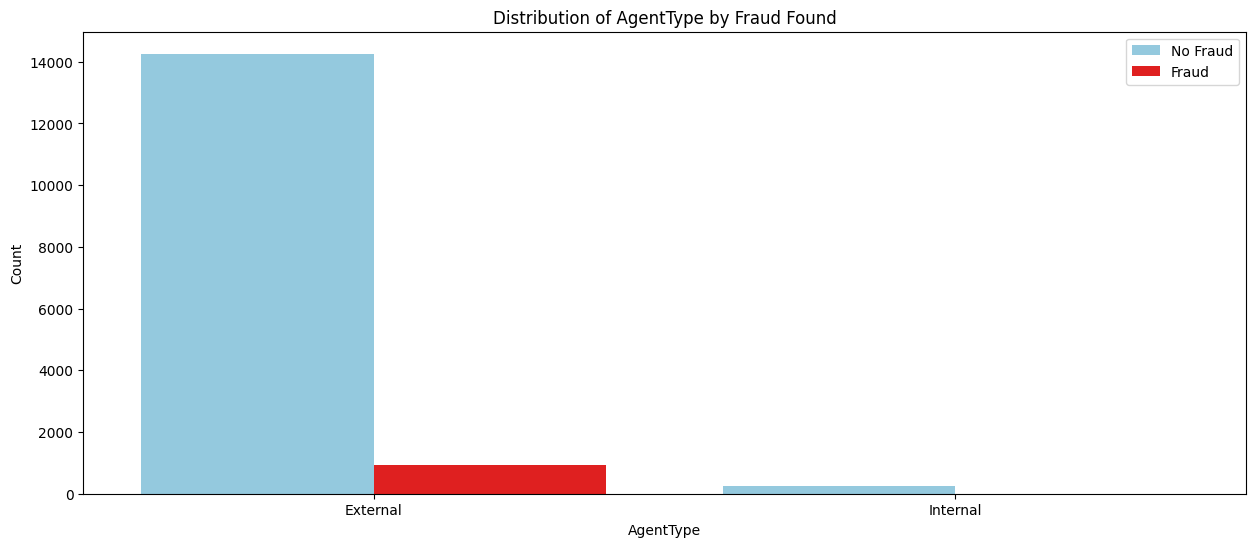

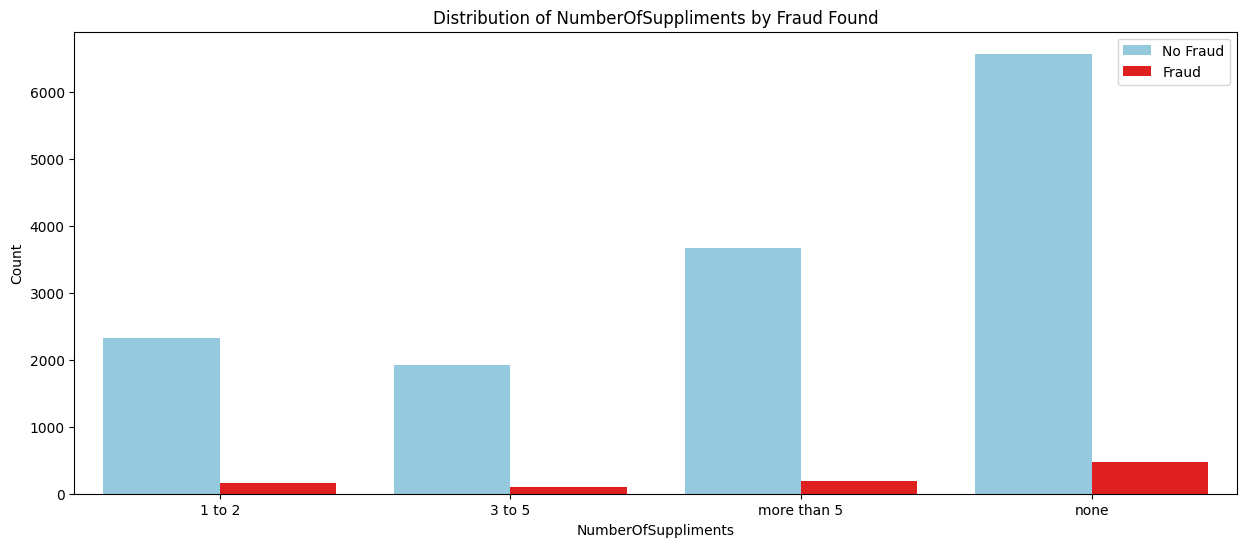

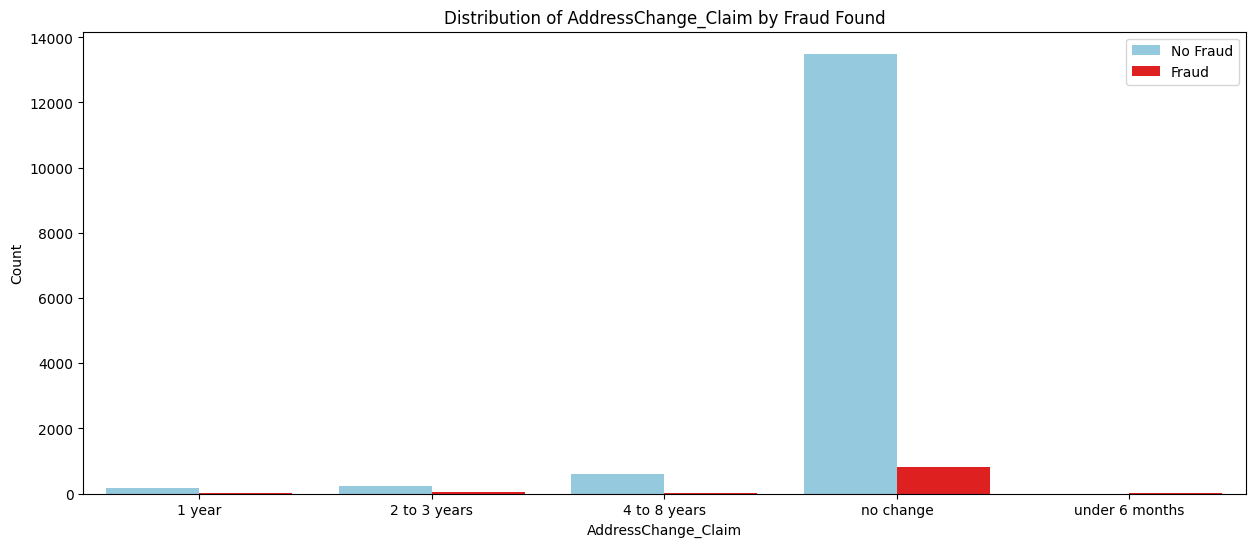

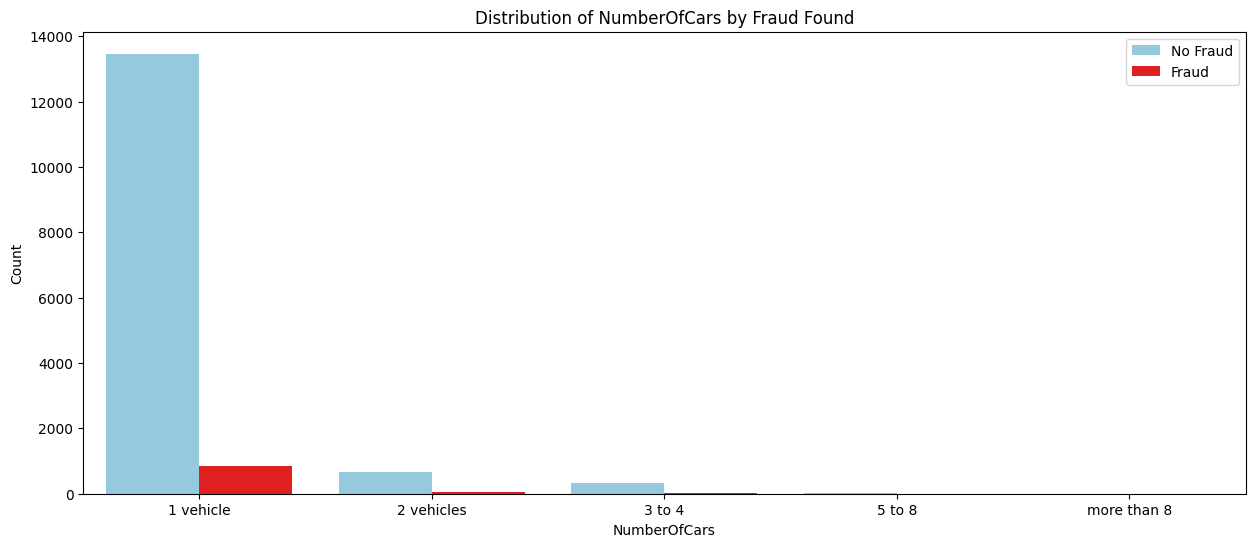

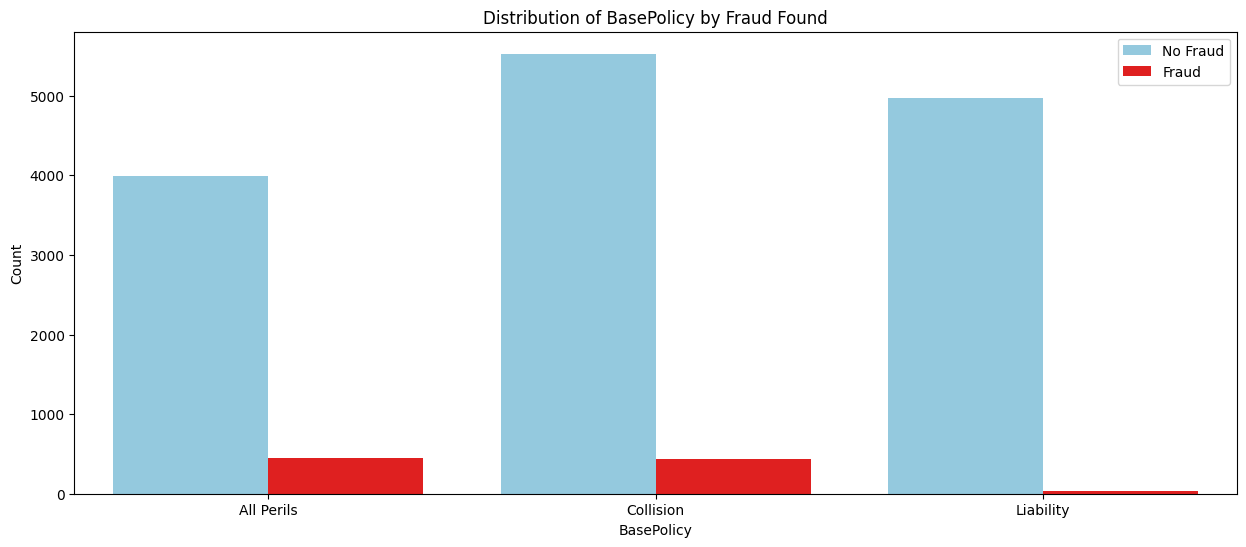

In [16]:
# Categorical variables
categorical_vars = ['Month', 'DayOfWeek','Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'Sex', 
                       'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'AgeOfPolicyHolder',
                       'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 
                       'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 
                       'AddressChange_Claim', 'NumberOfCars', 'BasePolicy']
# Defining the colors
colors = ['skyblue', 'red']

# Plotting the distribution of each categorical variable by FraudFound_P
for var in categorical_vars:
    plt.figure(figsize=(15, 6))
    sns.countplot(data=fraud_data, x=var, hue='FraudFound_P', palette=colors)
    plt.title(f'Distribution of {var} by Fraud Found')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.legend(['No Fraud', 'Fraud'])
    plt.show()

    

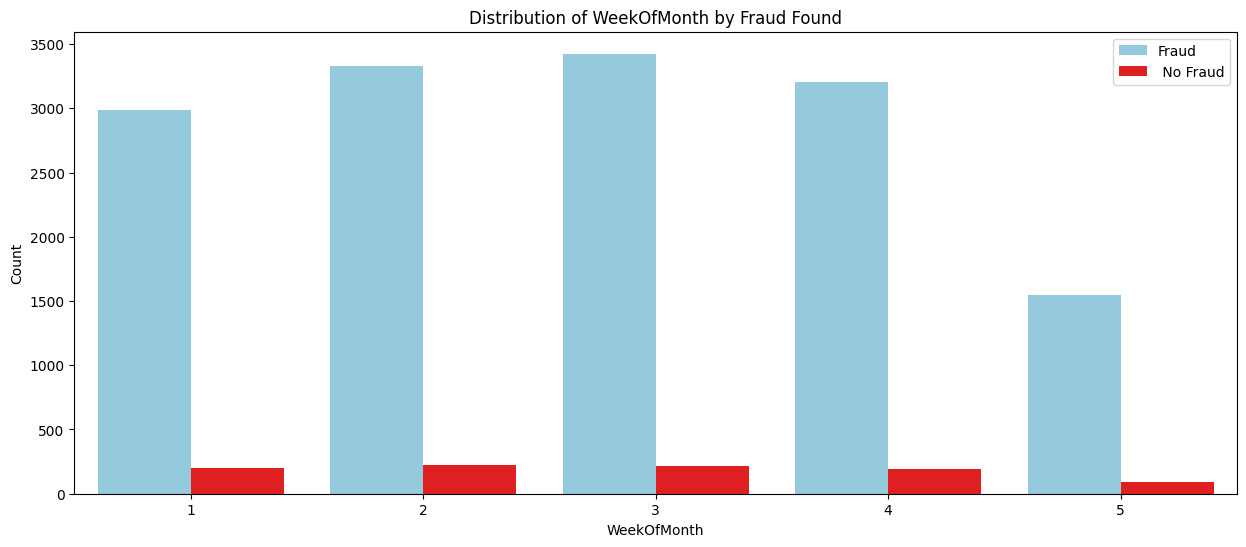

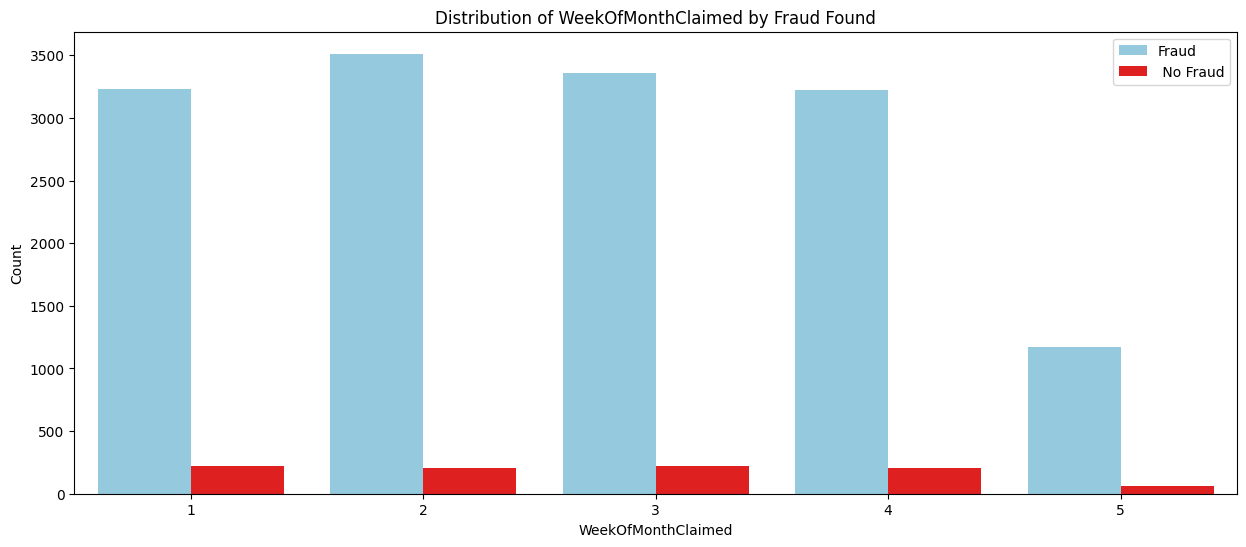

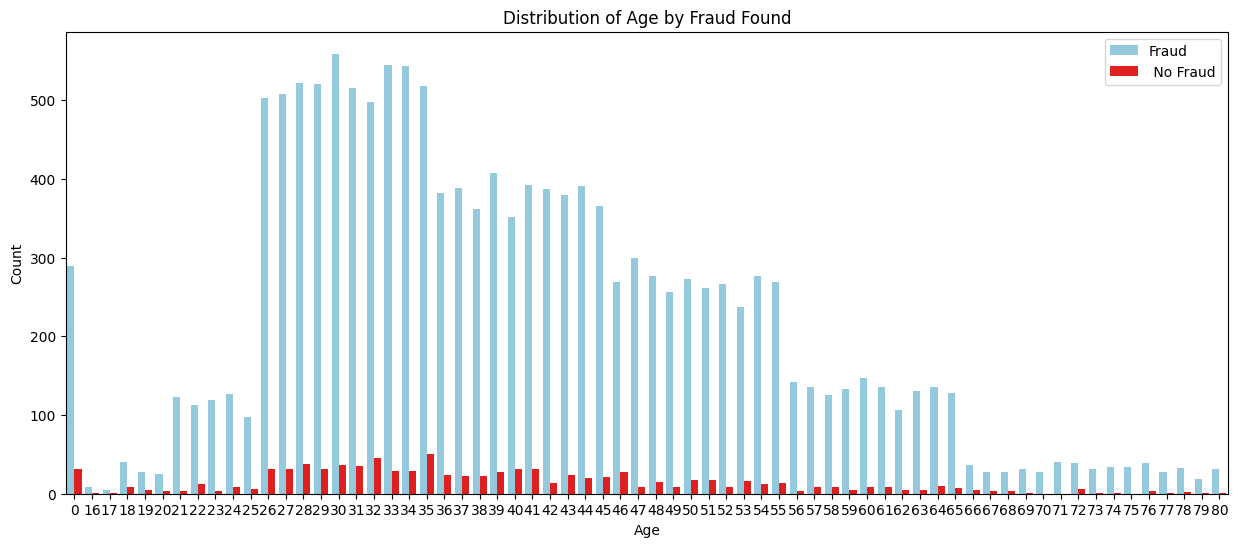

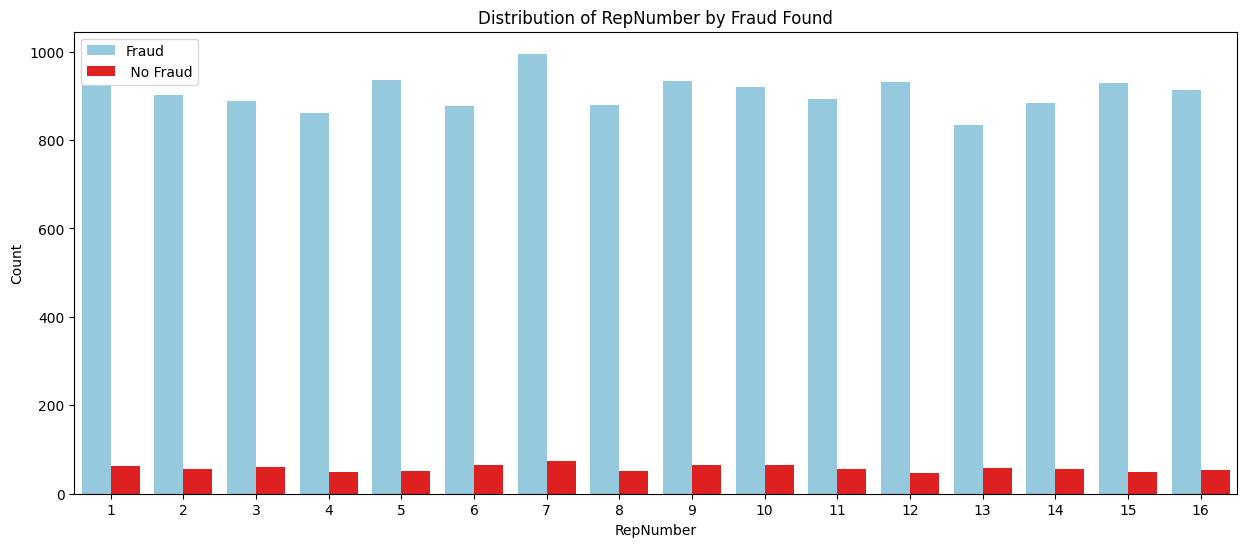

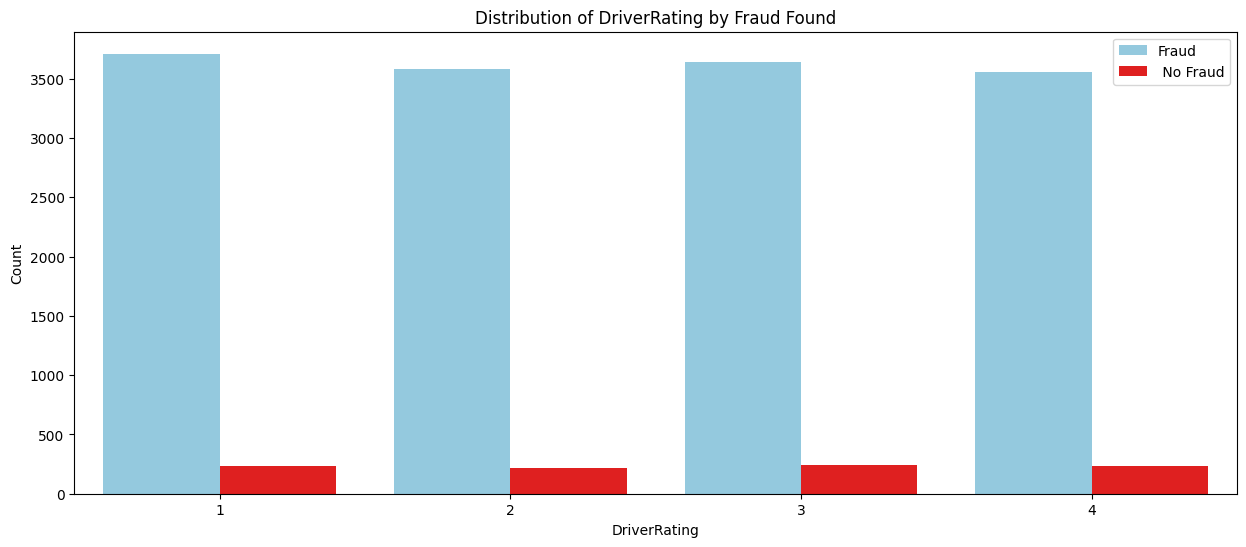

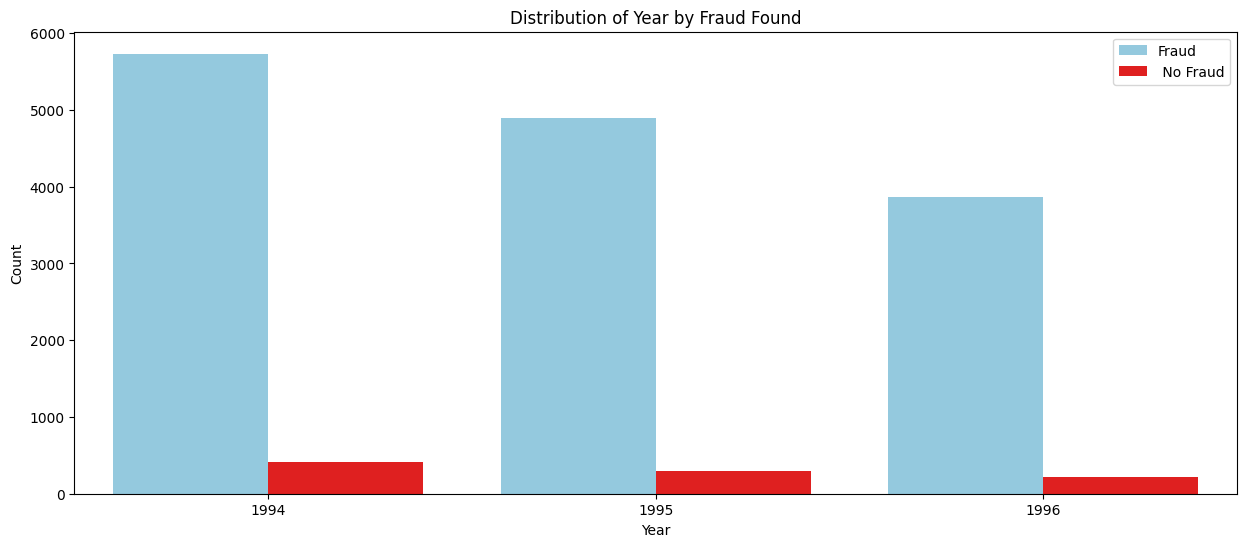

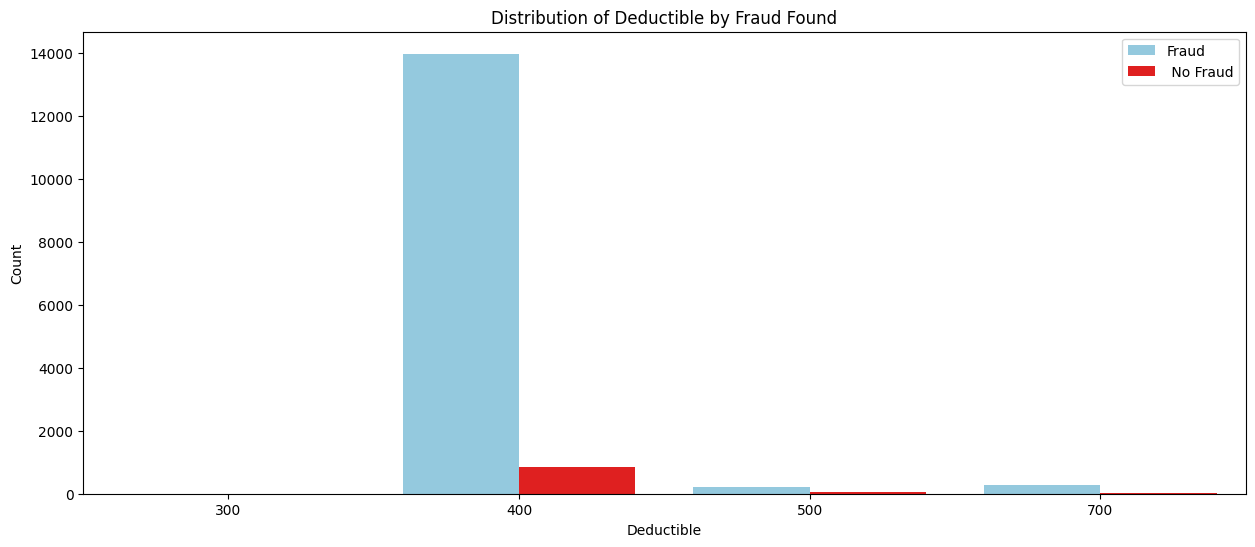

In [17]:
# Numerical variables
numerical_vars = ['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'RepNumber', 'DriverRating','Year', 'Deductible']

 # Defining the colors
colors = ['skyblue', 'red']

# Plotting the distribution of each Numerical variable by FraudFound_P
for var in numerical_vars:
    plt.figure(figsize=(15, 6))
    sns.countplot(data=fraud_data, x=var, hue='FraudFound_P', palette=colors)
    plt.title(f'Distribution of {var} by Fraud Found')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.legend(['Fraud', ' No Fraud'])
    plt.show()


In [18]:
print(fraud_data.dtypes)

Month                   category
WeekOfMonth                int64
DayOfWeek                 object
Make                    category
AccidentArea            category
DayOfWeekClaimed        category
MonthClaimed            category
WeekOfMonthClaimed         int64
Sex                     category
MaritalStatus           category
Age                        int64
Fault                   category
PolicyType              category
VehicleCategory         category
VehiclePrice            category
FraudFound_P              object
PolicyNumber               int64
RepNumber                  int64
Deductible                 int64
DriverRating               int64
Days_Policy_Accident    category
Days_Policy_Claim       category
PastNumberOfClaims      category
AgeOfVehicle            category
AgeOfPolicyHolder       category
PoliceReportFiled       category
WitnessPresent          category
AgentType               category
NumberOfSuppliments     category
AddressChange_Claim     category
NumberOfCa

In [19]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()


# Iterate over each non-numerical column in the dataframe
for column in fraud_data.select_dtypes(include=['object', 'category']):
    # Encode the values in the column
    fraud_data[column] = label_encoder.fit_transform(fraud_data[column])

# Verify the data type conversion
print(fraud_data.dtypes)


Month                   int32
WeekOfMonth             int64
DayOfWeek               int32
Make                    int32
AccidentArea            int32
DayOfWeekClaimed        int32
MonthClaimed            int32
WeekOfMonthClaimed      int64
Sex                     int32
MaritalStatus           int32
Age                     int64
Fault                   int32
PolicyType              int32
VehicleCategory         int32
VehiclePrice            int32
FraudFound_P            int32
PolicyNumber            int64
RepNumber               int64
Deductible              int64
DriverRating            int64
Days_Policy_Accident    int32
Days_Policy_Claim       int32
PastNumberOfClaims      int32
AgeOfVehicle            int32
AgeOfPolicyHolder       int32
PoliceReportFiled       int32
WitnessPresent          int32
AgentType               int32
NumberOfSuppliments     int32
AddressChange_Claim     int32
NumberOfCars            int32
Year                    int64
BasePolicy              int32
dtype: obj

In [20]:
# to check for correlation

corr_matrix = fraud_data.corr()
corr_matrix

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
Month,1.000000,0.010631,-0.009539,0.000546,-0.000044,-0.025755,0.724350,0.042027,0.002912,-0.003970,...,-0.029197,0.010779,0.009988,-0.002106,0.015759,-0.010887,-0.007519,0.001343,0.028736,0.020496
WeekOfMonth,0.010631,1.000000,-0.011631,-0.001635,0.009116,0.015153,0.010057,0.275400,0.005314,0.019612,...,-0.014946,-0.002758,0.013026,0.013713,0.006477,-0.002903,0.008328,0.002521,-0.003906,-0.007765
DayOfWeek,-0.009539,-0.011631,1.000000,0.003368,0.006561,0.097745,-0.011879,-0.013871,-0.021240,-0.006635,...,0.003909,0.013371,-0.011897,0.000139,0.011524,-0.010927,-0.005163,0.002006,0.002614,0.014889
Make,0.000546,-0.001635,0.003368,1.000000,0.004274,-0.005093,0.010118,-0.007832,-0.026381,-0.010647,...,-0.052966,0.052117,-0.008074,-0.000487,-0.014907,-0.025212,-0.003402,-0.000212,0.010880,-0.019868
AccidentArea,-0.000044,0.009116,0.006561,0.004274,1.000000,-0.011037,-0.002248,0.006584,-0.033804,0.003040,...,-0.012642,0.007964,0.001754,-0.028362,-0.005189,0.005056,0.003706,-0.007805,0.002284,0.043798
DayOfWeekClaimed,-0.025755,0.015153,0.097745,-0.005093,-0.011037,1.000000,-0.015568,0.013794,-0.000255,-0.018227,...,-0.006638,0.008848,-0.018367,-0.001387,-0.015376,0.019374,0.011229,-0.010416,0.003641,-0.014311
MonthClaimed,0.724350,0.010057,-0.011879,0.010118,-0.002248,-0.015568,1.000000,0.032591,-0.002214,-0.007955,...,-0.021683,0.019002,0.014008,-0.008587,0.016161,0.001370,-0.013402,-0.001779,0.021079,0.028323
WeekOfMonthClaimed,0.042027,0.275400,-0.013871,-0.007832,0.006584,0.013794,0.032591,1.000000,0.003739,0.000283,...,0.003832,0.001397,0.023510,0.009369,-0.011314,-0.007100,-0.008343,0.008246,0.012175,0.013785
Sex,0.002912,0.005314,-0.021240,-0.026381,-0.033804,-0.000255,-0.002214,0.003739,1.000000,-0.114391,...,0.209108,0.065444,-0.007413,-0.005585,0.012681,0.001952,0.004435,0.000081,0.000413,-0.069761
MaritalStatus,-0.003970,0.019612,-0.006635,-0.010647,0.003040,-0.018227,-0.007955,0.000283,-0.114391,1.000000,...,-0.304202,-0.454045,0.011763,0.013862,0.007579,0.016742,-0.009533,-0.008308,-0.013994,0.047999


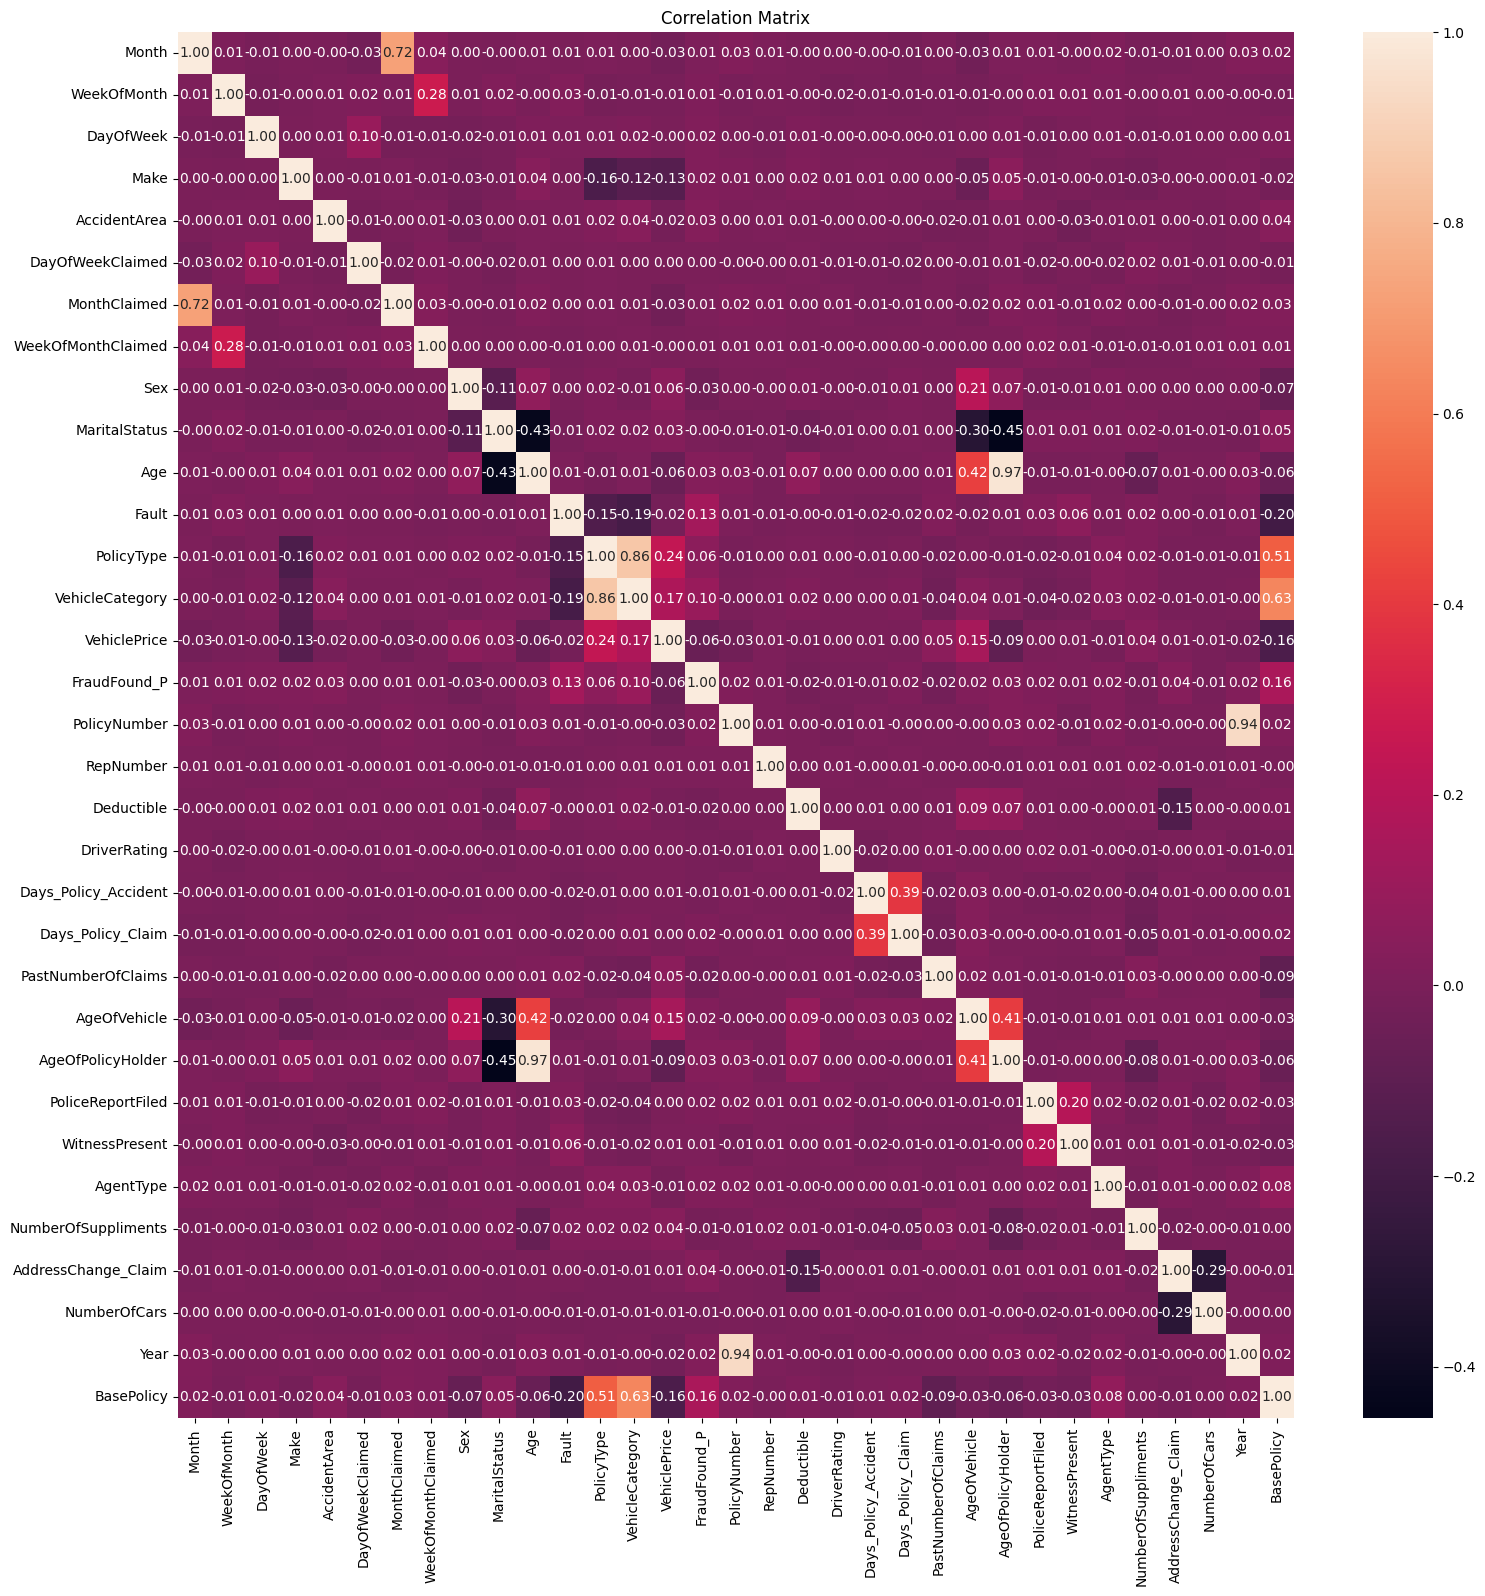

In [21]:
# To plot a heatmap of the correlation matrix
#plotting the correlation matrix
plt.figure(figsize=(18, 18))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()



##  Removing irrelevant variables 
The irrelevant variables dataset will be removed. These include the variables related to time series analysis such as the year, month, day of the week, etc. Also. 'Age' and 'PolicyHolder' are the same, so we will be taking out 'Age'.

In [22]:
#To drop unnecessary columns
fraud_data.drop(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make','MonthClaimed', 'DayOfWeekClaimed', 'AgeOfVehicle',
                 'WeekOfMonthClaimed', 'RepNumber', 'Age', 'PolicyNumber', 'Days_Policy_Claim',
                   'PastNumberOfClaims', 'AddressChange_Claim'], axis=1, inplace=True)

In [36]:
# To check the columns in the dataset
fraud_data.columns


Index(['AccidentArea', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'FraudFound_P', 'Deductible',
       'DriverRating', 'Days_Policy_Accident', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'NumberOfCars', 'Year', 'BasePolicy'],
      dtype='object')

In [41]:
#Assign predictors and target variable
y = fraud_data['FraudFound_P']
X = fraud_data.drop('FraudFound_P', axis=1)

X.head()
#y.head()

,AccidentArea,Sex,MaritalStatus,Fault,PolicyType,VehicleCategory,VehiclePrice,Deductible,DriverRating,Days_Policy_Accident,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,NumberOfCars,Year,BasePolicy
0,1,0,2,0,5,1,5,300,1,3,3,0,0,0,3,2,1994,2
1,1,1,2,0,4,1,5,400,4,3,4,1,0,0,3,0,1994,1
2,1,1,1,0,4,1,5,400,3,3,6,0,0,0,3,0,1994,1
3,0,1,1,1,2,1,0,400,2,3,7,1,0,0,2,0,1994,2
4,1,0,2,1,4,1,5,400,1,3,4,0,0,0,3,0,1994,1


In [24]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.2, random_state=42)

#### To perform SMOTE. The dataset is highly imbalanced. This step is to generate synthetic samples for the minority class in the training set. It is essential to avoid model bias.

In [25]:
#Simple oversampling: duplicate the minority class
minority_class_indices = y_train[y_train == 1].index
majority_class_indices = y_train[y_train == 0].index
minority_class_oversampled_indices = np.random.choice(minority_class_indices, size=len(majority_class_indices), replace=True)
oversampled_indices = np.concatenate([majority_class_indices, minority_class_oversampled_indices])


X_train_oversampled = X_train.loc[oversampled_indices]
y_train_oversampled = y.loc[oversampled_indices]

In [26]:
# Feature Scaling
scaler = StandardScaler()
X_train_oversampled_scaled = scaler.fit_transform(X_train_oversampled)
X_test_scaled = scaler.transform(X_test)

In [27]:
#training a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_oversampled_scaled, y_train_oversampled)

RandomForestClassifier(random_state=42)

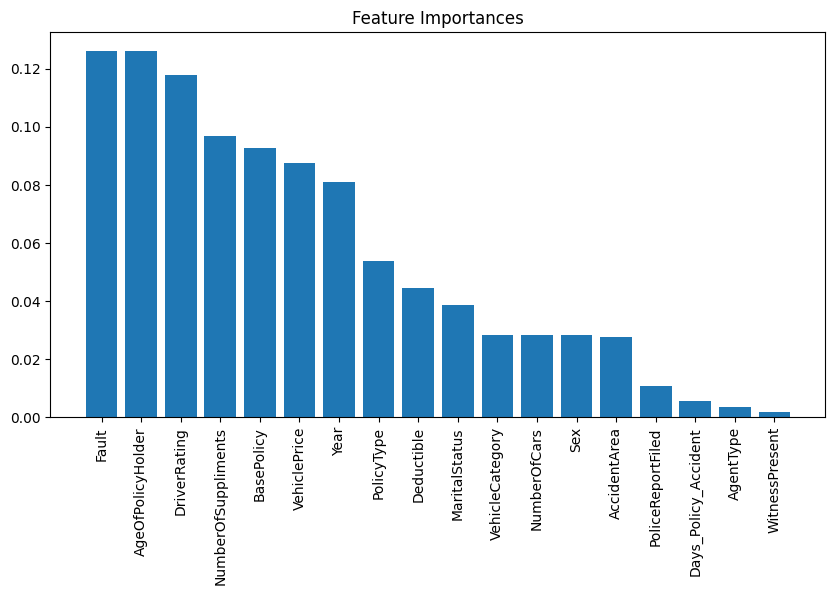

In [28]:
#Plottting the feature importances
features = X.columns
feature_importances = model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 5))
plt.title('Feature Importances')
plt.bar(range(X_train_oversampled_scaled.shape[1]), feature_importances[indices])
plt.xticks(range(X_train_oversampled_scaled.shape[1]), [features[i] for i in indices], rotation=90)
plt.show()

In [29]:
from sklearn.feature_selection import SelectFromModel
#feature selection using Random Forest to select the most important features
selector = SelectFromModel( RandomForestClassifier(n_estimators=100, random_state=42))
selector.fit(X_train_oversampled_scaled, y_train_oversampled)
X_train_selected = selector.transform(X_train_oversampled_scaled)
X_test_selected = selector.transform(X_test_scaled)


In [30]:
# to check the selected features from the feature selection and the number of selected features
selected_features = X.columns[selector.get_support()]
print(selected_features)
print(len(selected_features))


Index(['Fault', 'VehiclePrice', 'DriverRating', 'AgeOfPolicyHolder',
       'NumberOfSuppliments', 'Year', 'BasePolicy'],
      dtype='object')
7


## Predictive Model Building

In [31]:
# training multiple models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

In [32]:
results = {}
for name, model in models.items():
    model.fit(X_train_selected, y_train_oversampled)
    y_pred = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1 Score': f1
    }
    print(f'{name} Performance:')
    print(classification_report(y_test, y_pred))
    print("confusion matrix")
    print (confusion_matrix(y_test, y_pred))
    print("=" *60)


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.14      0.84      0.24       197
           1       0.98      0.65      0.79      2887

    accuracy                           0.67      3084
   macro avg       0.56      0.75      0.52      3084
weighted avg       0.93      0.67      0.75      3084

confusion matrix
[[ 166   31]
 [ 997 1890]]
K-Nearest Neighbors Performance:
              precision    recall  f1-score   support

           0       0.13      0.81      0.23       197
           1       0.98      0.64      0.78      2887

    accuracy                           0.65      3084
   macro avg       0.56      0.73      0.50      3084
weighted avg       0.93      0.65      0.74      3084

confusion matrix
[[ 160   37]
 [1037 1850]]
Support Vector Machine Performance:
              precision    recall  f1-score   support

           0       0.13      0.93      0.23       197
           1       0.99      0.58      0.73    

In [33]:

# Selecting the performing best model
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = models[best_model_name]

# Fit the best model on the entire dataset
best_pipeline = make_pipeline(None, best_model) #No need for preprocessing: the data is already preprocessed
best_pipeline.fit(X, y)

# Save the best model
import joblib
joblib.dump(best_pipeline, 'best_model.pkl')
print(f'The best model is {best_model_name} and has been saved as best_model.pkl')



The best model is Random Forest and has been saved as best_model.pkl


In [34]:
#Load the best model
loaded_model = joblib.load('best_model.pkl')

#create a sample data for prediction
sample_data = X_test.head(1)

#Make a prediction using the loaded model
prediction = loaded_model.predict(sample_data)

# map the predicted outcome to a user friendly message
prediction = 'This Claim is predicted to be Non-Fradulent' if prediction[0] == 1 else 'This Claim is predicted to be Fradulent'
print(f'The prediction for the sample data is: {prediction}')
 

The prediction for the sample data is: This Claim is predicted to be Non-Fradulent
